In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

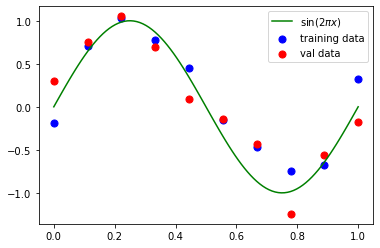

In [27]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

def mse(truth, predict):
    truth = np.array(truth)
    predict = np.array(predict)
    return np.mean((truth - predict) ** 2)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

x_val, y_val = create_toy_data(func, 10, 0.25)

plt.scatter(x_train, y_train, facecolor="b", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=50, label="val data")

plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [28]:
dict1 = {'x_train':x_train, 'y_train' :y_train}
train_df = pd.DataFrame(dict1)
train_df.head()

,x_train,y_train
0,0.000000,-0.193691
1,0.111111,0.700861
2,0.222222,1.035557
3,0.333333,0.781026
4,0.444444,0.456055


In [32]:
dict2 = {'x_val':x_val, 'y_val' :y_val}
val_df = pd.DataFrame(dict2)
val_df.head()

,x_val,y_val
0,0.000000,0.296275
1,0.111111,0.752878
2,0.222222,1.052362
3,0.333333,0.695606
4,0.444444,0.095860


In [33]:
dict3 = {'x_test':x_test, 'y_test' :y_test}
test_df = pd.DataFrame(dict3)
test_df.head()

,x_test,y_test
0,0.000000,0.000000
1,0.010101,0.063424
2,0.020202,0.126592
3,0.030303,0.189251
4,0.040404,0.251148


In [29]:
class LinearRegression:
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def find_coefficient(self):
        t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        x = np.concatenate((np.ones((self.df.shape[0], 1)), feature), axis= 1)
        w = np.array(np.linalg.inv(x.T.dot(x)).dot(x.T).dot(t)).reshape(feature.shape[1]+1, 1)
        return w

    def add_predict_column(self):
        newdf = self.df.copy()
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        w = self.find_coefficient()
        newdf['predict'] = feature.dot(w[1:,]) + w[0]
        return newdf

    def mse(self):
        newdf = self.add_predict_column()
        return np.mean((newdf['predict'] - newdf[self.target]) ** 2)

    def predict_value(self, list1):
        array = np.array(list1).reshape(1,len(list1))
        w = self.find_coefficient()
        return array.dot(w[1:,]) + w[0]

    def print_model(self):
        feature = (self.df.loc[:, self.df.columns != self.target])
        w = self.find_coefficient()
        print('y =', end=' ')
        for i in range(1, len(w)):
            print(round(float(w[i][0]),2), feature.columns[i-1], '+', end=' ')
        print(round(float(w[0][0]),2))

In [ ]:
class RidgeRegression:
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def add_predict_column(self):
        newdf = self.df.copy()
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        w = self.find_coefficient()
        newdf['predict'] = feature.dot(w[1:,]) + w[0]
        return newdf

In [30]:
model1 = LinearRegression(train_df, 'y_train')
print(model1.find_coefficient())
model1.print_model()
model1.mse()

[[ 0.60316574]
 [-0.99389969]]
y = -0.99 x_train + 0.6


0.26664813895762907

MSE Train: 0.2666481389576291
MSE Val: 0.22507565504994753


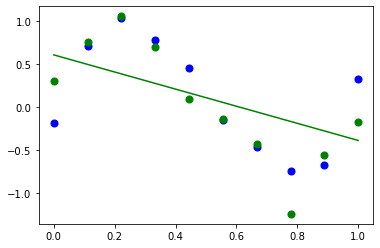

In [31]:
model1_predict = model1.add_predict_column()
plt.scatter(x_train,y_train, facecolor="b", edgecolor="b", s=50, label="val data")
plt.scatter(x_val, y_val, facecolor="g", edgecolor="g", s=50, label="val data")
plt.plot(x_train, model1_predict.predict,'g')
print('MSE Train:',mse(y_train, model1_predict.predict))
print('MSE Val:',mse(y_val, model1_predict.predict))

In [34]:
train_df3 = train_df.copy()
train_df3['x^2'] = x_train ** 2
train_df3['x^3'] = x_train ** 3

In [35]:
model3 = LinearRegression(train_df3, 'y_train')
print(model3.find_coefficient())
model3.print_model()

[[ -0.20124854]
 [ 11.54858418]
 [-32.25927199]
 [ 21.18116496]]
y = 11.55 x_train + -32.26 x^2 + 21.18 x^3 + -0.2


MSE Training: 0.003979330735354716
MSE Validation: 0.08261116952409822


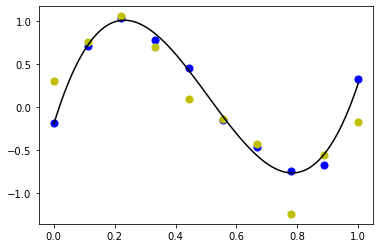

In [42]:
w3 = model3.find_coefficient()
x3 = np.linspace(0,1,100)
y3 = w3[1]*x3 + w3[2]*x3**2 + w3[3]*x3**3 + w3[0]
model3_predict = model3.add_predict_column()
plt.scatter(x_train,y_train, facecolor="b", edgecolor="b", s=50, label="val data")
plt.scatter(x_val, y_val, facecolor="y", edgecolor="y", s=50, label="val data")
plt.plot(x3, y3,'black')

print('MSE Train:',mse(y_train, model3_predict.predict))
print('MSE Val:',mse(y_val, model3_predict.predict))

In [44]:
train_df9 = train_df.copy()
train_df9['x^2'] = x_train ** 2
train_df9['x^3'] = x_train ** 3
train_df9['x^4'] = x_train ** 4
train_df9['x^5'] = x_train ** 5
train_df9['x^6'] = x_train ** 6
train_df9['x^7'] = x_train ** 7
train_df9['x^8'] = x_train ** 8
train_df9['x^9'] = x_train ** 9

In [45]:
model9 = LinearRegression(train_df9,'y_train')
print(model9.find_coefficient())
model9.print_model()

[[-1.93662355e-01]
 [-4.33513104e+01]
 [ 1.22099435e+03]
 [-1.11506266e+04]
 [ 5.20185032e+04]
 [-1.40697821e+05]
 [ 2.29043188e+05]
 [-2.21065720e+05]
 [ 1.16440950e+05]
 [-2.57655951e+04]]
y = -43.35 x_train + 1220.99 x^2 + -11150.63 x^3 + 52018.5 x^4 + -140697.82 x^5 + 229043.19 x^6 + -221065.72 x^7 + 116440.95 x^8 + -25765.6 x^9 + -0.19


MSE Train: 2.5108408481728555e-10
MSE Val: 0.08960119794575958


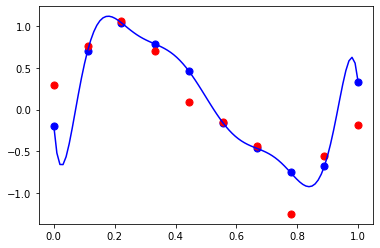

In [49]:
w9= model9.find_coefficient()
x9 = np.linspace(0,1,100)
y9 = w9[1]*x9 + w9[2]*x9**2 + w9[3]*x9**3 + w9[4]*x9**4 + w9[5]*x9**5 + w9[6]*x9**6  + w9[7]*x9**7 + w9[8]*x9**8 + w9[9]*x9**9 + w9[0]
model9_predict = model9.add_predict_column()
plt.scatter(x_train,y_train, facecolor="b", edgecolor="b", s=50, label="val data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=50, label="val data")
plt.plot(x9, y9,'b')
print('MSE Train:',mse(y_train, model9_predict.predict))
print('MSE Val:',mse(y_val, model9_predict.predict))